# RADIAL BASIS FUNCTION NERUAL NETWORK

center [array([0.51515152]), array([0.21212121]), array([-0.33333333]), array([-0.31313131]), array([-0.45454545]), array([-0.53535354]), array([0.35353535]), array([-0.6969697]), array([-0.57575758]), array([-0.83838384])]
[[1.05676022e-08 7.85859545e-06 2.85655008e-02 2.29529515e-02
  9.25352812e-02 1.77786712e-01 4.31299270e-07 4.79688225e-01
  2.36962572e-01 8.11429096e-01]
 [1.71890731e-08 1.15899655e-05 3.53190672e-02 2.85655008e-02
  1.10016852e-01 2.05924246e-01 6.65836147e-07 5.27326857e-01
  2.70904428e-01 8.52157700e-01]
 [2.77774606e-08 1.69817887e-05 4.33851086e-02 3.53190672e-02
  1.29949664e-01 2.36962572e-01 1.02122184e-06 5.75923505e-01
  3.07692233e-01 8.89105812e-01]
 [4.45960818e-08 2.47200191e-05 5.29463752e-02 4.33851086e-02
  1.52494854e-01 2.70904428e-01 1.55609784e-06 6.24904709e-01
  3.47201061e-01 9.21618123e-01]
 [7.11319879e-08 3.57501816e-05 6.41942099e-02 5.29463752e-02
  1.77786712e-01 3.07692233e-01 2.35568810e-06 6.73638455e-01
  3.89232983e-01 9.49101

<ipython-input-9-bfb46f824414>:35: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  y=sin(3*(x+0.5)**3-1)
<ipython-input-9-bfb46f824414>:16: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  G=zeros((X.shape[0],self.numCenters),float)
<ipython-input-9-bfb46f824414>:14: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return exp(-self.beta*norm(c-d)**2)
<ipython-input-9-bfb46f824414>:27: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead
  self.W=dot(pinv(G),Y)
<ipython-input-9-bfb46f824414>:30: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead
  Y=dot(G,self.W)


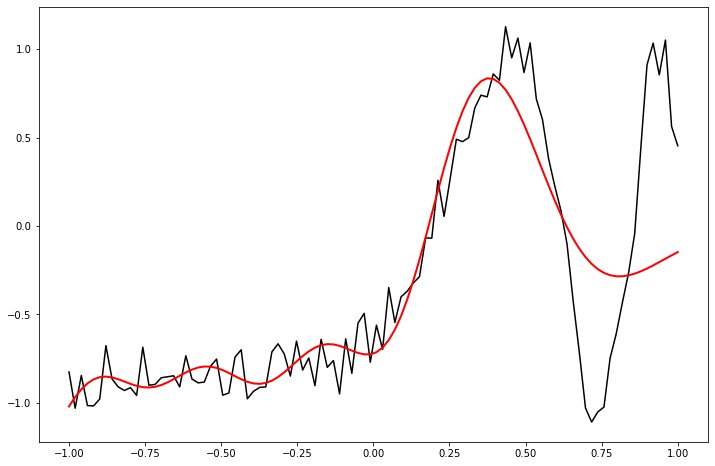

In [9]:
from scipy import*
from scipy.linalg import norm, pinv
from matplotlib import pyplot as plt
class RBF:
    def __init__ (self, indim, numCenters,outdim):
        self.indim = indim
        self.outdim=outdim
        self.numCenters=numCenters
        self.centers=[random.uniform(-1,1,indim) for i in range(numCenters)]
        self.beta=8
        self.W=random.random((self.numCenters,self.outdim))
    def _basisfunc(self,c,d):
        assert len(d)==self.indim
        return exp(-self.beta*norm(c-d)**2)
    def _calcAct(self,X):
        G=zeros((X.shape[0],self.numCenters),float)
        for ci,c in enumerate(self.centers):
            for xi,x in enumerate(X):
                G[xi,ci]=self._basisfunc(c,x)
        return G
    def train(self,X,Y):
        rnd_idx=random.permutation(X.shape[0])[:self.numCenters]
        self.centers=[X[i,:]for i in rnd_idx]
        print("center",self.centers)
        G=self._calcAct(X)
        print(G)
        self.W=dot(pinv(G),Y)
    def test(self,X):
        G=self._calcAct(X)
        Y=dot(G,self.W)
        return Y
if __name__=='__main__':
    n=100
x=mgrid[-1:1:complex(0,n)].reshape(n,1)
y=sin(3*(x+0.5)**3-1)
y+=random.normal(0,0.1,y.shape)
rbf=RBF(1,10,1)
rbf.train(x,y)
z=rbf.test(x)
plt.figure(figsize=(12,8))
plt.plot(x,y,'k-')
plt.plot(x,z,'r-',linewidth=2)
plt.show()
